In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dota2 = pd.read_csv('matches2.csv')

In [3]:
df_dota2.shape

(1816, 8)

In [4]:
df_dota2.head()

,Match ID,Hero,Kills,Deaths,Assists,KDA,Duration,Result
0,7126424404,Necrophos,11,14,23,2.428571,58.050000,Loss
1,7125468680,Nature's Prophet,4,6,21,4.166667,38.716667,Win
2,7124815702,Abaddon,6,8,26,4.000000,49.016667,Win
3,7113593492,Abaddon,17,4,15,8.000000,36.533333,Win
4,7112138813,Razor,12,11,16,2.545455,43.550000,Win


In [5]:
df_dota2[df_dota2.duplicated()]

,Match ID,Hero,Kills,Deaths,Assists,KDA,Duration,Result


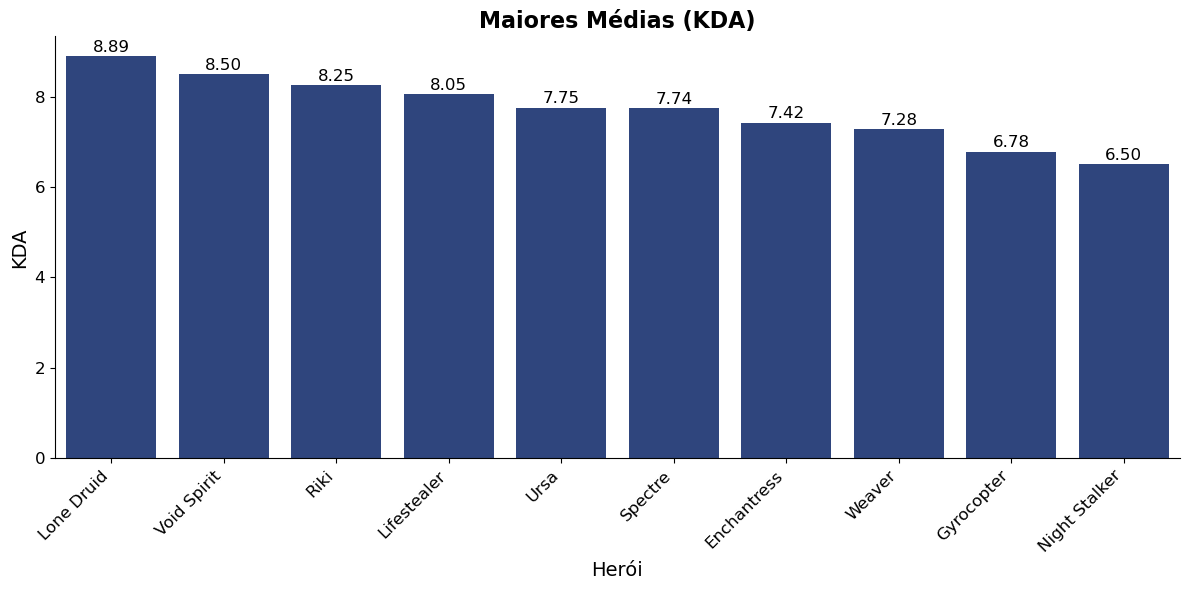

In [6]:
# agrupa por heroi e pega o KDA médio
df_maior_media_kda = df_dota2.groupby('Hero')['KDA'].mean().reset_index()

# Ordena do maior para o menor
df_maior_media_kda_ordenado = df_maior_media_kda.sort_values('KDA',ascending = False).head(10)

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Hero', y='KDA', data=df_maior_media_kda_ordenado, color='#22408A')
ax.set_title('Maiores Médias (KDA)', fontsize=16, fontweight='bold')
ax.set_xlabel('Herói', fontsize=14)
ax.set_ylabel('KDA', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, v in enumerate(df_maior_media_kda_ordenado['KDA']):
    ax.text(i, v+ 0.1, f'{v:,.2f}', ha='center', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

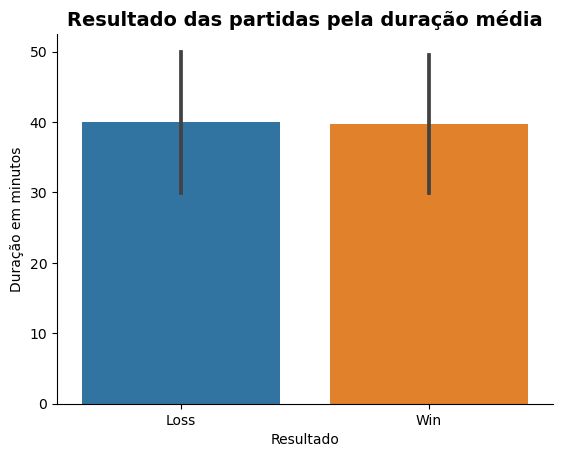

In [7]:
# Cria o gráfico mostrando a duração média para derrotas e vitórias
sns.barplot(x='Result', y='Duration', data=df_dota2,ci='sd')
plt.title('Resultado das partidas pela duração média', fontsize=14,fontweight='bold')
plt.xlabel('Resultado')
plt.ylabel('Duração em minutos')
sns.despine()
plt.show()

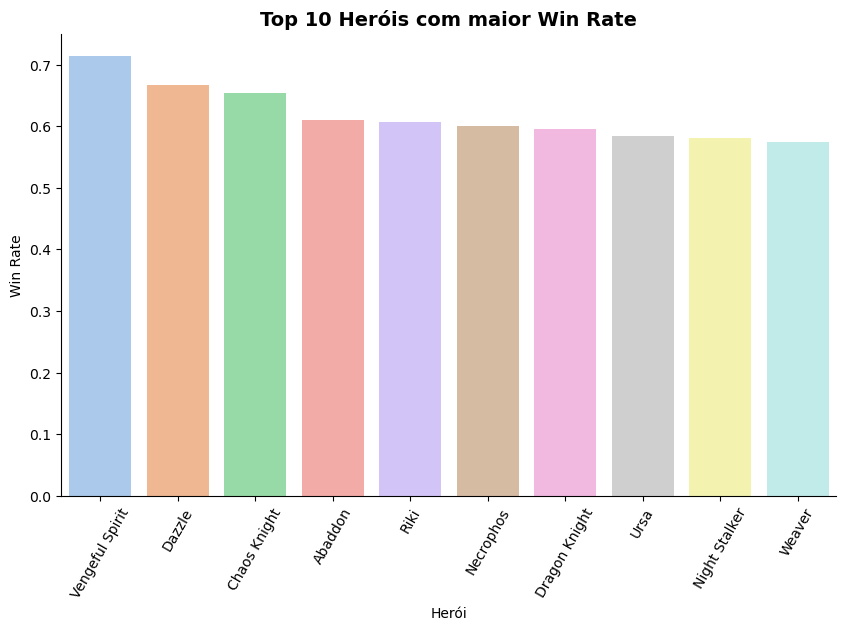

In [8]:
# Filtra os heróis com mais de 10 partidas
df_herois = df_dota2.groupby('Hero').filter(lambda x: len(x) > 10)

# Calcula o win rate de cada herói
heroi_win_rate = df_herois.groupby('Hero').apply(lambda x: (x['Result'] == 'Win').sum() / x['Result'].count())

# Ordena os heróis baseado no seu win rate
heroi_win_rate_ordenado = heroi_win_rate.sort_values(ascending=False)

# Define a paleta de cores
cores = sns.color_palette('pastel', n_colors=10)

# Plota o gráfico com os 10 heróis com maior win rate e com mais de 10 partidas jogadas
plt.figure(figsize=(10, 6))
sns.barplot(x=heroi_win_rate_ordenado.index[:10], y=heroi_win_rate_ordenado.values[:10], palette=cores)
plt.title('Top 10 Heróis com maior Win Rate', fontsize=14, fontweight='bold')
plt.xlabel('Herói')
plt.ylabel('Win Rate')
plt.xticks(rotation=60)
sns.despine()
plt.show()


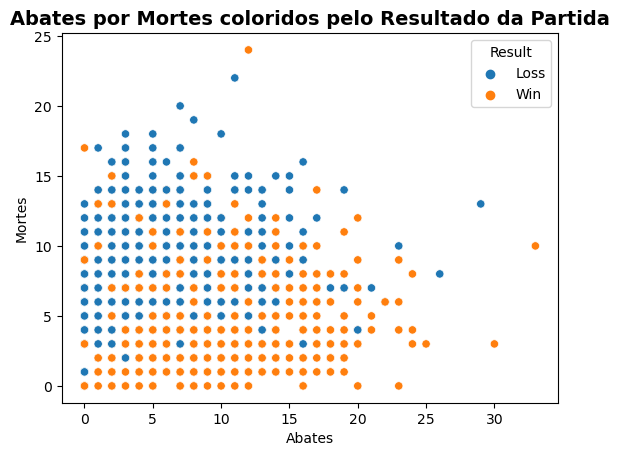

In [9]:
# Cria um gráfico de dispersão coloridos pelo resultado da partida
sns.scatterplot(x='Kills', y='Deaths', hue='Result', data=df_dota2)
plt.title('Abates por Mortes coloridos pelo Resultado da Partida', fontsize=14, fontweight='bold')
plt.xlabel('Abates')
plt.ylabel('Mortes')
plt.show()
